In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare


In [93]:
data_frame = pd.read_csv('/Users/sydneyperkins/Downloads/111b OPT Data - CSV.csv')
I = np.array(data_frame['Current (FWD) (87) (A)'])
freq_87 = np.array(data_frame['Freq (MHz) (87)'])
freq_85 = np.array(data_frame['Freq (Inc R) (Hz) (85)'])

freq_85 = freq_85[~np.isnan(freq_85)]

print(data_frame)

    Current (FWD) (87) (A)  Freq (MHz) (87)  Freq (Inc R) (Hz) (85)
0                    0.100          0.63250                 0.41700
1                    0.150          1.10250                 0.73000
2                    0.400          1.55500                 1.03000
3                    0.550          2.05250                 1.35300
4                    0.700          2.48750                 1.64575
5                    0.850          2.95250                 1.96000
6                    1.000          3.42575                 2.27250
7                    1.150          3.86500                 2.57250
8                    1.300          4.32750                 2.87750
9                    1.455          4.80125                 3.19250
10                   1.600          5.24750                 3.49250
11                   1.750          5.72000                 3.80000
12                  -1.740         -5.11250                -3.42000
13                  -1.650         -4.84250     

In [94]:
f_87 = 3.14*(I) + .271
f_85 = 2.1*(I) + .161

In [95]:
print(f_85, f_87)

[ 0.371   0.476   1.001   1.316   1.631   1.946   2.261   2.576   2.891
  3.2165  3.521   3.836  -3.493  -3.304  -3.094  -2.884  -2.674  -2.359
 -2.044  -1.729  -1.414  -1.099  -0.784  -0.469  -0.154   0.056   0.161 ] [ 0.585   0.742   1.527   1.998   2.469   2.94    3.411   3.882   4.353
  4.8397  5.295   5.766  -5.1926 -4.91   -4.596  -4.282  -3.968  -3.497
 -3.026  -2.555  -2.084  -1.613  -1.142  -0.671  -0.2     0.114   0.271 ]


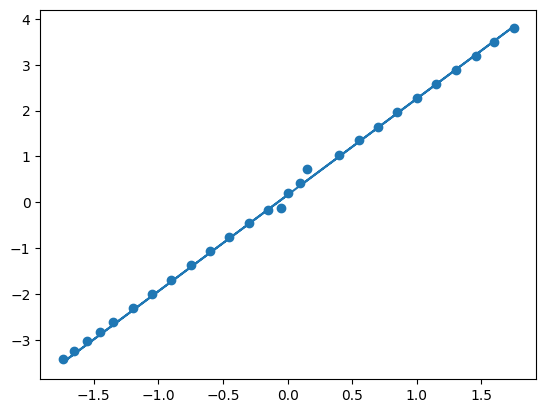

In [96]:
plt.plot(I, f_85)
plt.scatter(I, freq_85)

In [97]:
residual_87 = freq_87 - f_87
residual_85 = freq_85 - f_85
print(residual_87)

[ 0.0475   0.3605   0.028    0.0545   0.0185   0.0125   0.01475 -0.017
 -0.0255  -0.03845 -0.0475  -0.046    0.0801   0.0675  -0.0665  -0.128
  0.028    0.0045   0.0035   0.055   -0.0035  -0.0045  -0.0105  -0.0215
 -0.08    -0.279    0.069  ]


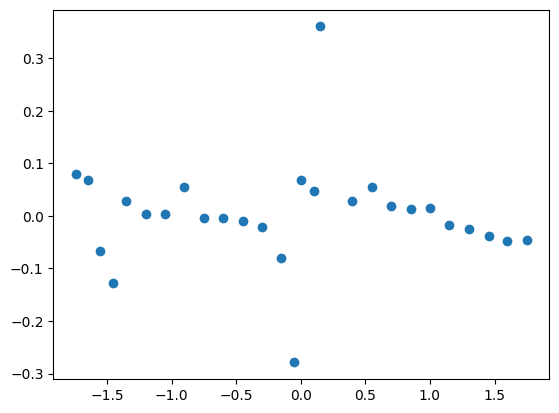

In [98]:
plt.scatter(I, residual_87)

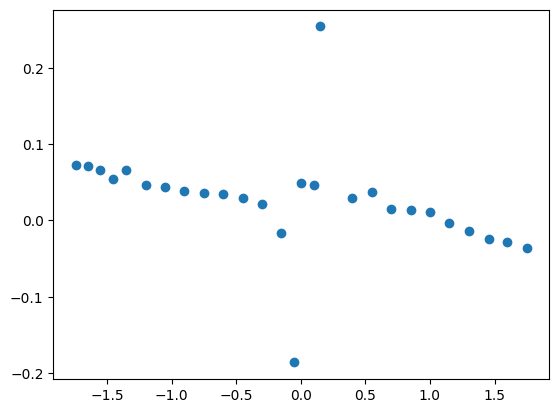

In [99]:
plt.scatter(I, residual_85)

In [102]:
chi_squared_87 = np.sum((residual_87) ** 2 / f_87)
chi_squared_85 = np.sum((residual_85) ** 2 / f_85)
print(chi_squared_85, chi_squared_87)

0.7613485728835427 0.8418202026245272
